## Predicting Price with Size

**Project Goal: To create a model that can predict the price of apartments in the city of Buenos Aires - with a focus on apartments that cost less than $400,000 USD.**

In [220]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted


warnings.simplefilter(action="ignore", category=FutureWarning)


### 1. Prepare Data

#### A. Import

In [221]:
# A function wrangle that takes a file path as an argument and returns a DataFrame

def wrangle(filepath):
    df= pd.read_csv(filepath)
    return df

In [222]:
df1=wrangle(filepath="data/buenos-aires-real-estate-1.csv")
print("df shape", df1.shape)
df1.head()

df shape (8606, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


In [223]:
# Check and assert the df length
assert(
    len(df1) <=8606
), f"`df1` should have no more than 4628 observations, not {len(df1)}."

#### Subset data

In [224]:
# Modify wrangle function to only return apartments in "Capital Federa" that cost less than $400, 000 USD
def wrangle(filepath):
    df= pd.read_csv(filepath)
    df = df[df["price_aprox_usd"] < 400000]
    df = df[df["property_type"] == "apartment"]
    df = df[df["place_with_parent_names"].str.contains("Capital Federa")]
    return df

In [225]:
# Recreating df1
df1=wrangle(filepath="data/buenos-aires-real-estate-1.csv")
print("df shape", df1.shape)
df1.head()

df shape (1781, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


In [226]:
# Check your work
assert (
    len(df1) <=1781
), f"`df1` should have no more than 1781 observations, not {len(df1)}."

#### B. Explore

##### Area Histogram

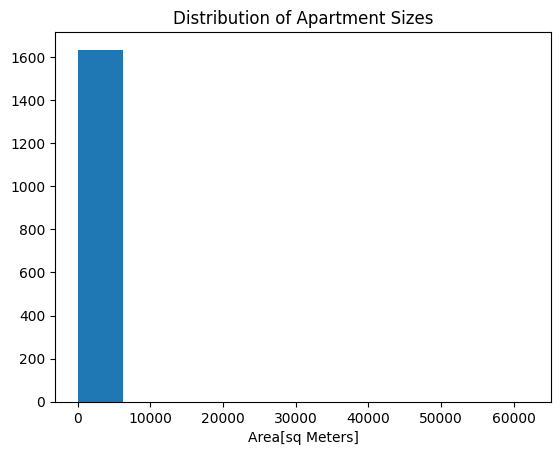

In [227]:
plt.hist(df1["surface_covered_in_m2"])
plt.xlabel("Area[sq Meters]")
plt.title("Distribution of Apartment Sizes");

The histogram above suggests that there are outliers in the dataset. This can affect model performance, especially in sort of linear models. To confirm whether the data indeed contains outliers, the next is to obtain a summary statistics of the data and evaluate the mean, standard deviation, minimum and maximum values.

##### Area Summary Statistics

In [228]:
df1["surface_covered_in_m2"].describe()

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm that there are potential outliers in the data. While most apartments in our dataset are smaller than 73 square meters, there are some that are several thousand square meters. Also, the minimum is 0, suggesting that there is an appartment with no area covered. Additionally, the standard deviation, or the spread aound the mean is too large suggesting there are outliers in  the data. 

##### Remove Outliers

To remove outliers, we modify the wrangle function so that it removes observations that are outliers in the 'surface_covered_in_m2' column. Specifically, all observation should fall between 0.1 and 0.9 quantiles for the 'surface_covered_in_m2' variable.

In [229]:
# .1 and .9 quantiles
df1["surface_covered_in_m2"].quantile([.1, .9])

0.1     31.0
0.9    100.0
Name: surface_covered_in_m2, dtype: float64

In [230]:
low, high = df1["surface_covered_in_m2"].quantile([.1, .9])
print("low:", low)
print("high:", high)

low: 31.0
high: 100.0


In [231]:
# Modifying the wrangle function

def wrangle(filepath):
    df= pd.read_csv(filepath)

    # Modify wrangle function to only return apartments in "Capital Federa" that cost less than $400, 000 USD
    df = df[df["price_aprox_usd"] < 400000]
    df = df[df["property_type"] == "apartment"]
    df = df[df["place_with_parent_names"].str.contains("Capital Federa")]
    
    # removes outliers
    low, high = df["surface_covered_in_m2"].quantile([.1, .9])
    df = df[df["surface_covered_in_m2"].between(low, high)]
    return df

In [232]:
df1=wrangle(filepath="data/buenos-aires-real-estate-1.csv")
print("df shape", df1.shape)
df1.head()

df shape (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


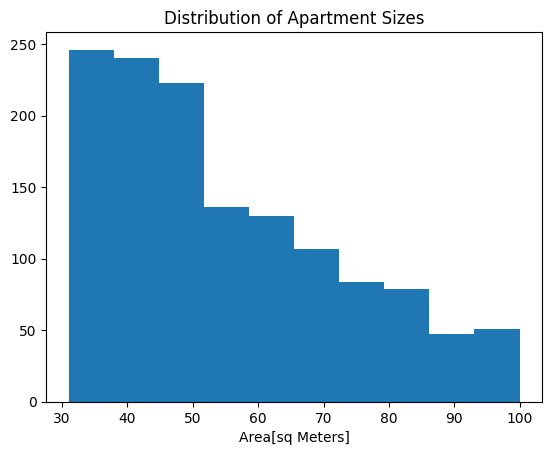

In [233]:
# Re-construct the histogram
plt.hist(df1["surface_covered_in_m2"])
plt.xlabel("Area[sq Meters]")
plt.title("Distribution of Apartment Sizes");

In [234]:
# Check the length
assert len(df1) <= 1343

##### Price vs Area Scatter Plot

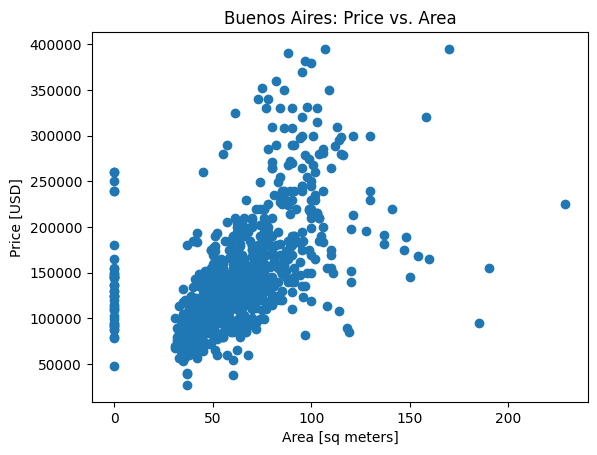

In [235]:
plt.scatter(x=df1["surface_total_in_m2"], y=df1["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area");

The scatter plot suggests a positive relationship between price and area. We can say that area influences price of houses in Buenos Aires.

##### Intro to Linear Models

- Linear models are all about straight lines.
- Linear models are concerned with minimizing the distance training data and the predictions.

#### C. Split Data

- Target (target vector): The thing we want to predict.
- Features (feature matrix): The information our model  will use to make its predictions.

 ##### Split Data: Feature Matrix

The next step is to create a feature matrix named X_train, which we will use to train our model. The matrix should contain one feature only: ["surface_covered_in_m2"]

In [236]:
features = ["surface_covered_in_m2"]
X_train = df1[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [237]:
# Assertion
assert X_train.shape == (
    1343,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

 ##### Split Data: Target Vector

Next step is to create a target vector y_train, which we'll use to train our model. The target is "price_aprox_usd".

In [238]:
target = "price_aprox_usd"
y_train = df1[target]
y_train.shape

(1343,)

In [239]:
# Assertion
assert y_train.shape == (1343, )

### 2. Building Model

#### A. Baseline

**Baselining:** How will we know the model is performing well? How 'dumb' the model would perform on the same data? Naive or baseline model is when a model makes only one prediction - in this case, it predicts the same price regardless of an apartment's size.

##### Baseline:  Calculate Mean

In [240]:
y_mean = y_train.mean()
y_mean

135527.83871928515

The mean is that one prediction that our dumb model will always make. The next is to generate a list that repeats the predictions for every observation in our dataset.

##### Baseline:  Prediction List

Next is to create a list that contains the value of y_mean repeated so that it's the same length at y.

In [241]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

##### Baseline:  Scatter Plot

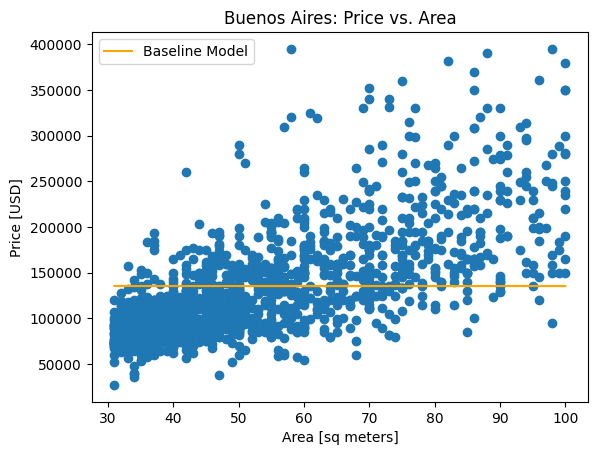

In [242]:
plt.plot(X_train,y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(x=X_train, y=y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

From the visualization, it seems like our baseliene model does't really follow the trend in the data. The next is to calculate performance metric. Specifically, we will calcuate the mean absolute error.

##### Baseline:  Mean Absolute Error

In [243]:
mae_baseline = mean_absolute_error(y_true=y_train, y_pred=y_pred_baseline)
print("Mean apt price: ", round(y_mean, 2))
print("Baseline MAE: ", round(mae_baseline, 2))

Mean apt price:  135527.84
Baseline MAE:  45199.46


The information above tells us that if we always predicted that an apartment price is  135527.84, our prediction would be off by an average of  54, 199.46. Additionally, it tells us that our model needs to have a mean absolute error below 45199.46 in order to be useful.

#### B. Iterate

Iterating involves building a model, training it, evaluating it, then repeating the process until you obtain best results. The iteration process rarely follows a straight line.

##### Instantiate Model

In [244]:
model = LinearRegression()

In [245]:
assert isinstance(model, LinearRegression)

##### Train Model

In [246]:
model.fit(X=X_train, y=y_train)

LinearRegression()

In [247]:
check_is_fitted(model)

#### C. Evaluate

##### Generate Predictions

In [248]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [249]:
# Assertion
assert (
    len(y_pred_training) == 1343
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

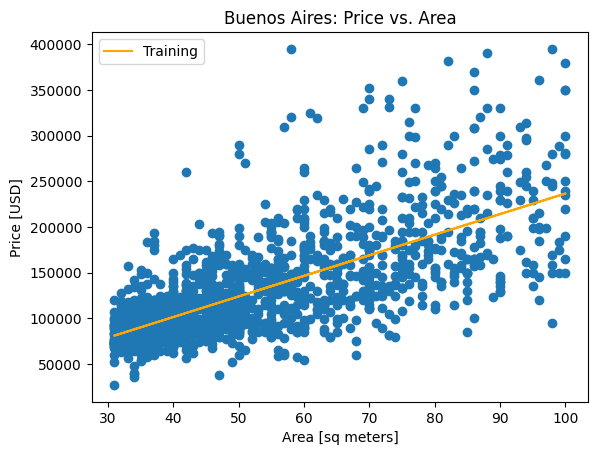

In [250]:
plt.plot(X_train,y_pred_training, color="orange", label="Training")
plt.scatter(x=X_train, y=y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

##### Training Mean Absolute Error

In [251]:
mae_training = mean_absolute_error(y_true=y_train, y_pred=y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


Our model beats the baseline model by over 10000!

Next is to use the model on a test set. The next step involves import the test features.

In [252]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

### 3. Communicate Results

##### Extract Model Intercept

In [256]:
intercept = round(model.intercept_, 2)
print("Model Intercepts:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercepts: 11433.31


##### Extract Coefficients

In [260]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


##### Generate Equation

In [267]:
print(f"apt_price = {intercept} + {coefficient}*surface_covered ")

apt_price = 11433.31 + 2253.12*surface_covered 


##### Plot Model

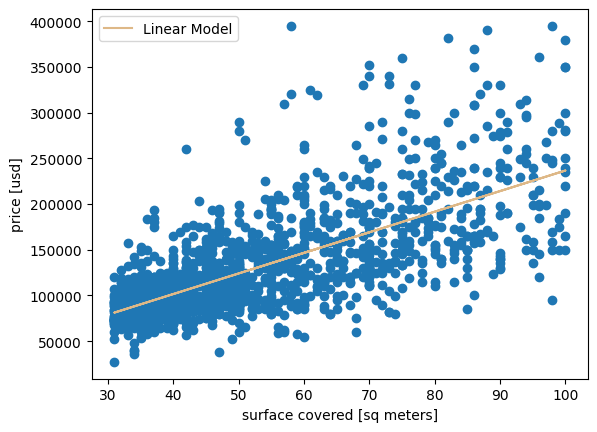

In [266]:
plt.plot(X_train, y_pred_training, color = "burlywood", label="Linear Model") 
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();